# Ejercicio 1

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
# import umap.umap_ as umap
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
import matplotlib
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.manifold import trustworthiness

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

In [3]:
columnas = [
    'Wine_type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]

In [4]:
df_wine = pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/parciales/segundo_parcial/previous_years/parcial_wine/data/wine.data', header=None, names=columnas)
df_wine.head()

,Wine_type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>

### → Validación de la data

In [5]:
print("El dataset tiene" , df_wine.shape[0], "filas y", df_wine.shape[1], "columnas")

El dataset tiene 178 filas y 14 columnas


In [6]:
df_wine.columns

Index(['Wine_type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

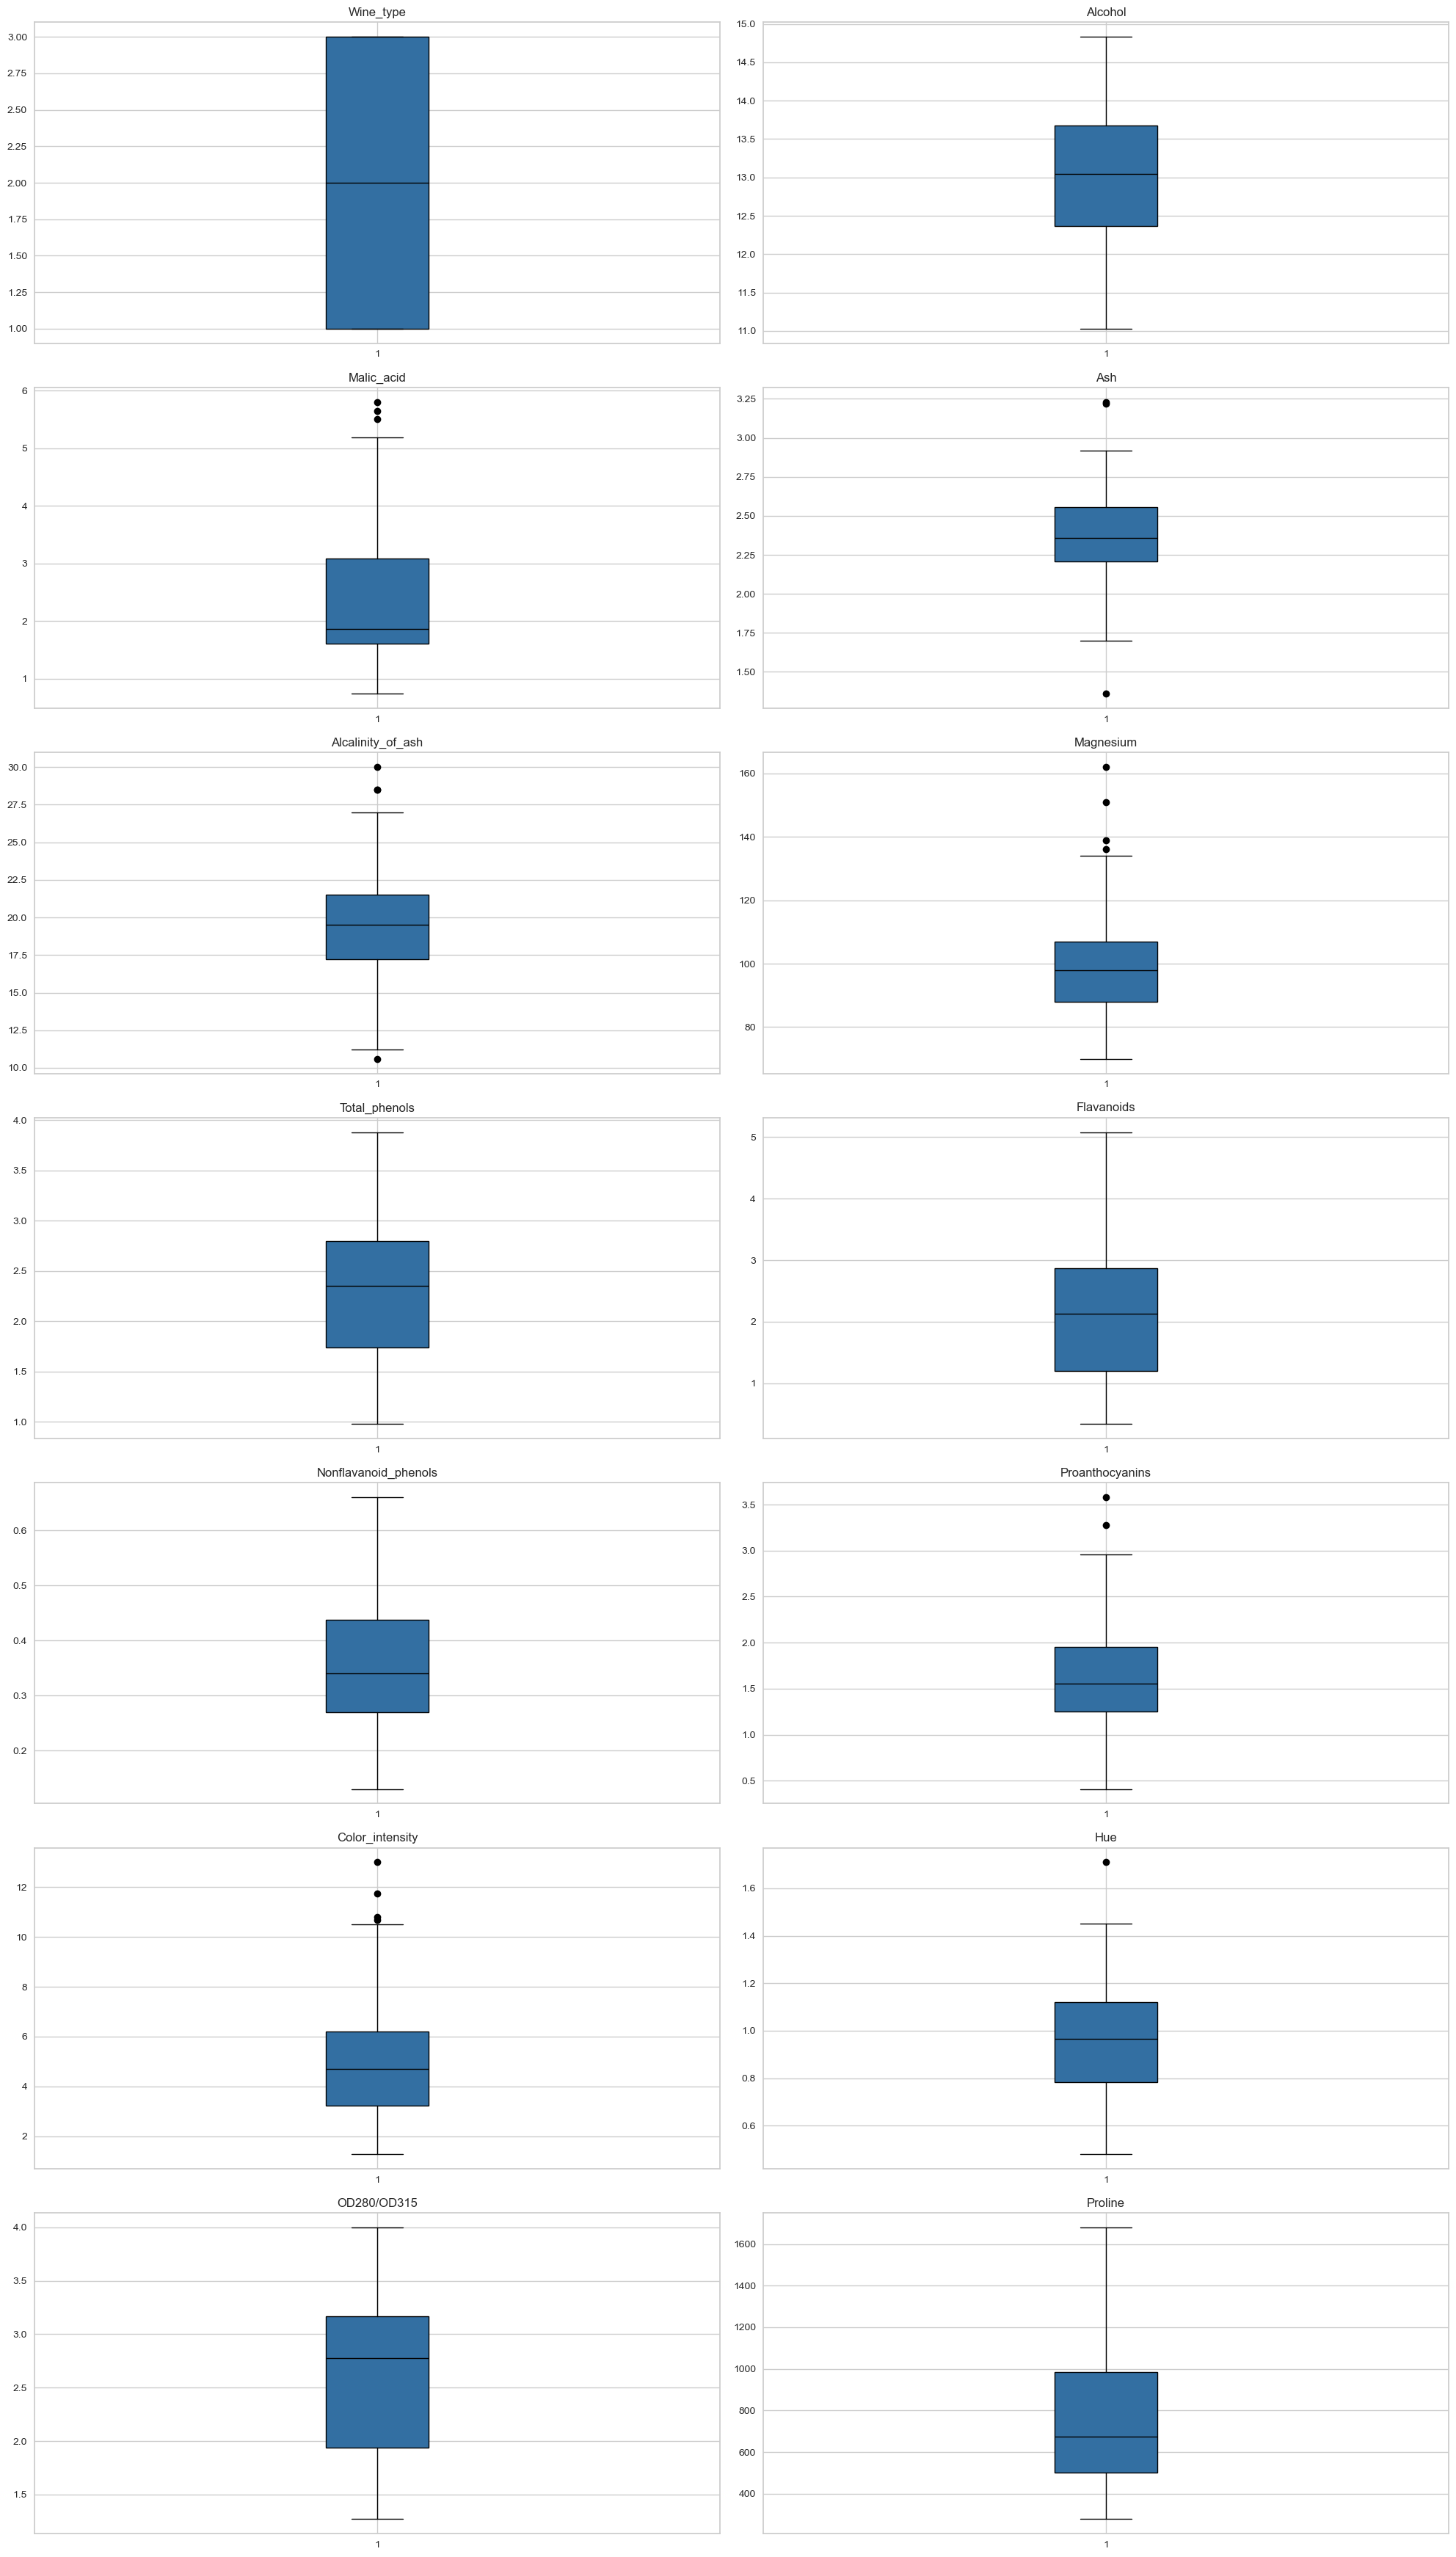

In [7]:
from funciones.funciones import plot_outliers
plot_outliers(df_wine)

<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

In [8]:
# ----------------------------------------
# A. Escalado completo sin remover outliers
# ----------------------------------------

# 1. Separar variables numéricas (sin 'Wine_type')
X = df_wine.drop('Wine_type', axis=1)

# 2. Escalar
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_array, columns=X.columns)

print("✅ Escalado completo sin remover outliers → 'scaled_df' generado.")


✅ Escalado completo sin remover outliers → 'scaled_df' generado.


In [9]:
# ----------------------------------------
# B. Remuevo de outliers con Z-Score y escalado
# ----------------------------------------

# 1. Calcular Z-scores sobre los datos originales
z_scores = np.abs(zscore(X))
threshold = 3  # Umbral clásico para detectar outliers

# 2. Máscara booleana para mantener solo filas sin outliers en ninguna variable
mask_kmeans = (z_scores < threshold).all(axis=1)

# 3. Aplicar máscara
X_clean = X[mask_kmeans].copy()
df_wine_clean = df_wine.loc[mask_kmeans].copy()  # si querés conservar las clases reales

# 4. Escalar nuevamente los datos sin outliers
scaled_array_clean = scaler.fit_transform(X_clean)
scaled_df_clean = pd.DataFrame(scaled_array_clean, columns=X_clean.columns)

print(f"✅ Datos sin outliers escalados → 'scaled_df_clean' generado ({len(scaled_df_clean)} filas)")
X_clean = X[mask_kmeans].copy()
df_clean = df_wine.loc[mask_kmeans].copy()  # si querés conservar las clases reales

✅ Datos sin outliers escalados → 'scaled_df_clean' generado (168 filas)


In [10]:
print("✅ Transformaciones logarítmicas aplicadas a variables sesgadas.")
print("✅ Todas las variables están codificadas y escaladas.")
print("📊 DataFrame final listo para clustering o PCA:")
scaled_df.head()

✅ Transformaciones logarítmicas aplicadas a variables sesgadas.
✅ Todas las variables están codificadas y escaladas.
📊 DataFrame final listo para clustering o PCA:


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">REDUCCIÓN DE DIMENSIONALIDAD</p>

En este problema, hay muchos factores (atributos o características) sobre los cuales se va a hacer la clasificación final. Cuantas más características haya, más difícil va a ser trabajar con ellas. Muchas de estas características están correlacionadas y, por lo tanto, son redundantes. Es por eso que voy a hacer una **reducción de dimensionalidad** sobre las características seleccionadas antes de pasar a la parte de clustering.

> *La reducción de dimensionalidad es el proceso de reducir el número de variables aleatorias bajo consideración, obteniendo un conjunto de variables principales.*

---

### 🧠 ¿Qué es PCA?

**El Análisis de Componentes Principales (PCA)** es una técnica para reducir la dimensionalidad de conjuntos de datos de este tipo, aumentando la interpretabilidad pero al mismo tiempo minimizando la pérdida de información.

### ✨ Pasos en esta sección:

- Reducción de dimensionalidad con PCA
- Visualización del dataframe reducido en 3D


### 🔽 Reducción de dimensionalidad con PCA



In [11]:
# Inicia cronómetro
start_time = time.time()

In [12]:
# 1. Matriz de covarianza para KMeans (sin outliers)
cov_matrix_kmeans = np.cov(scaled_df_clean.T)
print("✅ Matriz de covarianza para KMeans calculada")

✅ Matriz de covarianza para KMeans calculadaIntel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.



In [13]:
# 2. Autovalores y Autovectores para KMeans
eig_vals_kmeans, eig_vecs_kmeans = np.linalg.eig(cov_matrix_kmeans)
print("\n🧮 Autovalores (KMeans):")
print(eig_vals_kmeans.round(3))
print("\n🧮 Autovectores (KMeans):")
print(eig_vecs_kmeans.round(3))


🧮 Autovalores (KMeans):
[5.077 2.631 1.252 0.864 0.778 0.609 0.497 0.08  0.166 0.343 0.301 0.225
 0.256]

🧮 Autovectores (KMeans):
[[-0.17   0.459  0.16   0.038 -0.261  0.216  0.3    0.039 -0.233 -0.31
  -0.493 -0.301  0.209]
 [ 0.245  0.244 -0.078  0.49   0.064  0.659 -0.217 -0.039  0.07  -0.135
   0.096  0.176 -0.29 ]
 [ 0.011  0.304 -0.719 -0.124 -0.081  0.004  0.113  0.029  0.016  0.15
   0.297 -0.481 -0.11 ]
 [ 0.283 -0.049 -0.542  0.157  0.081 -0.24   0.315 -0.042 -0.056 -0.271
  -0.302  0.491  0.16 ]
 [-0.122  0.375 -0.133 -0.464  0.511  0.069 -0.482 -0.016  0.051 -0.031
  -0.267  0.151  0.125]
 [-0.386  0.043 -0.134  0.196 -0.077 -0.041 -0.03   0.454 -0.263  0.507
  -0.295  0.242 -0.325]
 [-0.42  -0.028 -0.101  0.145 -0.011 -0.034 -0.014 -0.851 -0.136  0.117
  -0.088  0.046 -0.151]
 [ 0.293  0.016 -0.106 -0.091 -0.701 -0.031 -0.506 -0.121  0.044  0.2
  -0.197  0.085  0.21 ]
 [-0.318  0.017 -0.097  0.466 -0.004 -0.393 -0.468  0.171 -0.066 -0.446
   0.153 -0.152  0.141]
 [ 0.072

In [14]:
# 3. Varianza explicada manual para KMeans
total_var_kmeans = eig_vals_kmeans.sum()
explained_var_ratio_kmeans = eig_vals_kmeans / total_var_kmeans
cumulative_var_kmeans = np.cumsum(explained_var_ratio_kmeans)

In [15]:
# 4. Tabla resumen para KMeans
var_df_kmeans = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(eig_vals_kmeans))],
    'Eigenvalue': eig_vals_kmeans,
    'Explained Variance Ratio': explained_var_ratio_kmeans,
    'Cumulative Variance': cumulative_var_kmeans
}).round(4)

print("📊 Tabla resumen de PCA (KMeans):")
display(var_df_kmeans)

📊 Tabla resumen de PCA (KMeans):


,PC,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,PC1,5.0770,0.3882,0.3882
1,PC2,2.6313,0.2012,0.5894
2,PC3,1.2520,0.0957,0.6851
3,PC4,0.8640,0.0661,0.7512
4,PC5,0.7776,0.0595,0.8107
5,PC6,0.6090,0.0466,0.8572
6,PC7,0.4966,0.0380,0.8952
7,PC8,0.0801,0.0061,0.9013
8,PC9,0.1656,0.0127,0.9140
9,PC10,0.3428,0.0262,0.9402


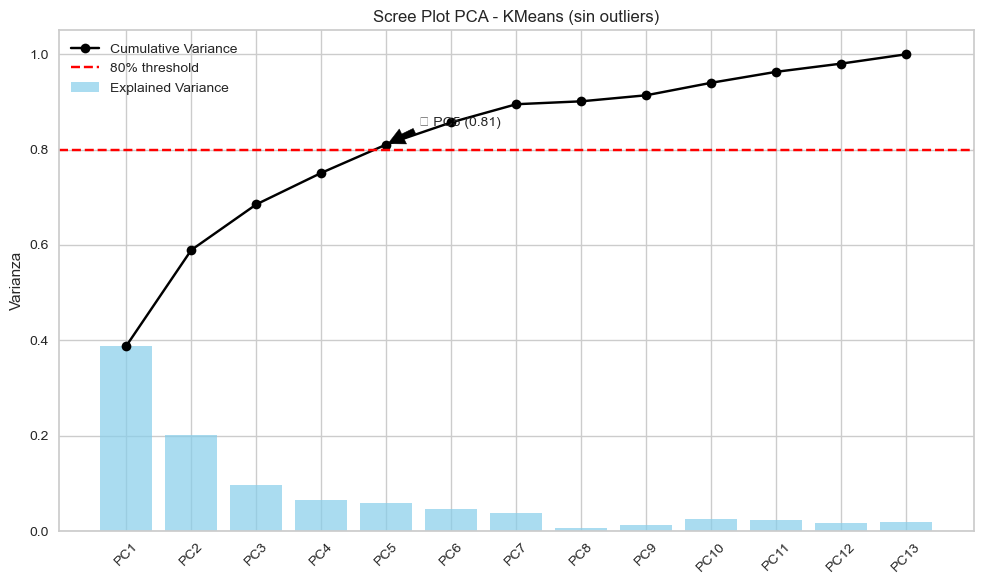

In [16]:
threshold = 0.80  # podés ajustar este valor más adelante si hacés una visualización o modelado con otro objetivo

# --- Scree plot para KMeans ---
plt.figure(figsize=(10, 6))
plt.bar(var_df_kmeans['PC'], var_df_kmeans['Explained Variance Ratio'], alpha=0.7, color='skyblue', label='Explained Variance')
plt.plot(var_df_kmeans['PC'], var_df_kmeans['Cumulative Variance'], marker='o', color='black', label='Cumulative Variance')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'{int(threshold*100)}% threshold')

opt_component_kmeans = np.argmax(var_df_kmeans['Cumulative Variance'] >= threshold)
plt.annotate(f"⭢ {var_df_kmeans['PC'][opt_component_kmeans]} ({var_df_kmeans['Cumulative Variance'][opt_component_kmeans]:.2f})",
             xy=(opt_component_kmeans, var_df_kmeans['Cumulative Variance'][opt_component_kmeans]),
             xytext=(opt_component_kmeans+0.5, threshold+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10)
plt.title("Scree Plot PCA - KMeans (sin outliers)")
plt.ylabel("Varianza")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# PCA para KMeans (sin outliers)
opt_pca_viz_kmeans = np.argmax(cumulative_var_kmeans >= 0.60) + 1
opt_pca_model_kmeans = np.argmax(cumulative_var_kmeans >= 0.80) + 1

print(f"🔍 PCA KMeans - visualización: {opt_pca_viz_kmeans} componentes (≥60%)")
print(f"📦 PCA KMeans - modelado: {opt_pca_model_kmeans} componentes (≥80%)")

🔍 PCA KMeans - visualización: 3 componentes (≥60%)
📦 PCA KMeans - modelado: 5 componentes (≥80%)


In [18]:
# 7. Fit PCA con ese número óptimo
# ----------- PCA para KMeans (sin outliers) -----------
pca_viz_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit_transform(scaled_df_clean)
pca_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit_transform(scaled_df_clean)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [19]:
# ----------- Cargas para PCA de visualización (KMeans - sin outliers) -----------
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
loadings_viz_kmeans = pd.DataFrame(
    pca_viz_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)]
)
print("🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):")
display(loadings_viz_kmeans.round(3))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
🎨 Cargas (loadings) - Visualización PCA KMeans (sin outliers):


,PCA1,PCA2,PCA3
Alcohol,0.170,0.459,-0.160
Malic_acid,-0.245,0.244,0.078
Ash,-0.011,0.304,0.719
Alcalinity_of_ash,-0.283,-0.049,0.542
Magnesium,0.122,0.375,0.133
Total_phenols,0.386,0.043,0.134
Flavanoids,0.420,-0.028,0.101
Nonflavanoid_phenols,-0.293,0.016,0.106
Proanthocyanins,0.318,0.017,0.097
Color_intensity,-0.072,0.515,-0.209


In [20]:
# ----------- Cargas para PCA de modelado (KMeans - sin outliers) -----------
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
loadings_model_kmeans = pd.DataFrame(
    pca_model_model_kmeans.components_.T,
    index=scaled_df_clean.columns,
    columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)]
)
print("📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):")
display(loadings_model_kmeans.round(3))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📦 Cargas (loadings) - Modelado PCA KMeans (sin outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5
Alcohol,0.170,0.459,-0.160,0.038,0.261
Malic_acid,-0.245,0.244,0.078,0.490,-0.064
Ash,-0.011,0.304,0.719,-0.124,0.081
Alcalinity_of_ash,-0.283,-0.049,0.542,0.157,-0.081
Magnesium,0.122,0.375,0.133,-0.464,-0.511
Total_phenols,0.386,0.043,0.134,0.196,0.077
Flavanoids,0.420,-0.028,0.101,0.145,0.011
Nonflavanoid_phenols,-0.293,0.016,0.106,-0.091,0.701
Proanthocyanins,0.318,0.017,0.097,0.466,0.004
Color_intensity,-0.072,0.515,-0.209,0.127,0.064


In [21]:
# ----------- Tiempo PCA para visualización (KMeans - sin outliers) -----------
start_viz_kmeans = time.time()
pca_viz_model_kmeans = PCA(n_components=opt_pca_viz_kmeans).fit(scaled_df_clean)
pca_viz_kmeans = pca_viz_model_kmeans.transform(scaled_df_clean)
elapsed_viz_kmeans = time.time() - start_viz_kmeans
print(f"🎨 Tiempo PCA visualización (KMeans - sin outliers): {elapsed_viz_kmeans:.3f} seg")

# ----------- Tiempo PCA para modelado (KMeans - sin outliers) -----------
start_model_kmeans = time.time()
pca_model_model_kmeans = PCA(n_components=opt_pca_model_kmeans).fit(scaled_df_clean)
pca_model_kmeans = pca_model_model_kmeans.transform(scaled_df_clean)
elapsed_model_kmeans = time.time() - start_model_kmeans
print(f"📦 Tiempo PCA modelado (KMeans - sin outliers): {elapsed_model_kmeans:.3f} seg")

🎨 Tiempo PCA visualización (KMeans - sin outliers): 0.003 seg
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
📦 Tiempo PCA modelado (KMeans - sin outliers): 0.003 seg


In [22]:
# ----------- PCA para KMeans (sin outliers) -----------
# Visualización
PCA_viz_df_kmeans = pd.DataFrame(pca_viz_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_viz_kmeans)])
PCA_viz_df_kmeans.index = scaled_df_clean.index
print("🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):")
display(PCA_viz_df_kmeans.head())

# Modelado
PCA_model_df_kmeans = pd.DataFrame(pca_model_kmeans, columns=[f"PCA{i+1}" for i in range(opt_pca_model_kmeans)])
PCA_model_df_kmeans.index = scaled_df_clean.index
print("📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):")
display(PCA_model_df_kmeans.head())

🎨 DataFrame PCA_viz_df_kmeans creado (visualización sin outliers):


,PCA1,PCA2,PCA3
0,3.480609,1.568589,0.063511
1,2.388124,-0.337494,-1.886458
2,2.624506,0.930060,1.223330
3,3.894769,2.695580,0.040986
4,1.013285,0.986126,2.412583


📦 DataFrame PCA_model_df_kmeans creado (modelado sin outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5
0,3.480609,1.568589,0.063511,-0.398207,-0.632180
1,2.388124,-0.337494,-1.886458,-0.673319,-0.024045
2,2.624506,0.930060,1.223330,1.062186,0.257078
3,3.894769,2.695580,0.040986,0.671661,0.023619
4,1.013285,0.986126,2.412583,-0.385064,-0.298921


In [23]:
# ----------- Interpretación PCA visualización (KMeans - sin outliers) -----------
print("\n🎨 Interpretación de componentes - PCA para visualización (KMeans):")
for i in range(opt_pca_viz_kmeans):
    top_vars = loadings_viz_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")

# ----------- Interpretación PCA modelado (KMeans - sin outliers) -----------
print("\n📦 Interpretación de componentes - PCA para modelado (KMeans):")
for i in range(opt_pca_model_kmeans):
    top_vars = loadings_model_kmeans.iloc[:, i].abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"🔎 PCA{i+1} influido por: {', '.join(top_vars)}")


🎨 Interpretación de componentes - PCA para visualización (KMeans):
🔎 PCA1 influido por: Flavanoids, Total_phenols, OD280/OD315
🔎 PCA2 influido por: Color_intensity, Alcohol, Magnesium
🔎 PCA3 influido por: Ash, Alcalinity_of_ash, Color_intensity

📦 Interpretación de componentes - PCA para modelado (KMeans):
🔎 PCA1 influido por: Flavanoids, Total_phenols, OD280/OD315
🔎 PCA2 influido por: Color_intensity, Alcohol, Magnesium
🔎 PCA3 influido por: Ash, Alcalinity_of_ash, Color_intensity
🔎 PCA4 influido por: Malic_acid, Proanthocyanins, Magnesium
🔎 PCA5 influido por: Nonflavanoid_phenols, Magnesium, Hue


### 🔽 Reducción de dimensionalidad con t-SNE

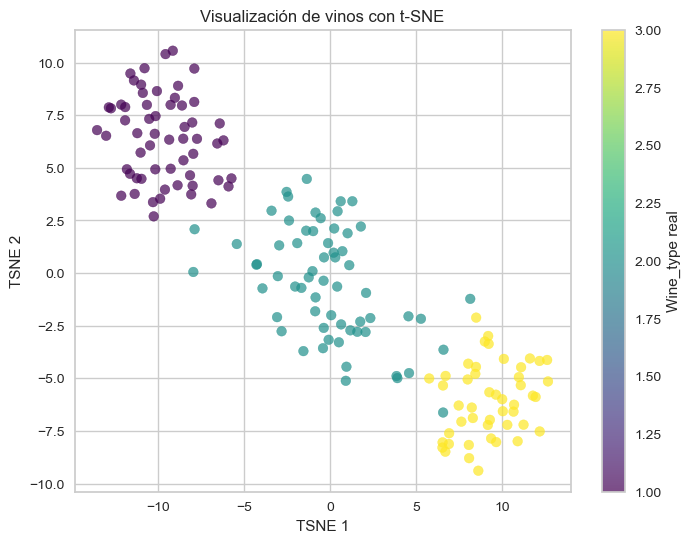

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(scaled_df_clean)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_clean['Wine_type'], cmap='viridis', alpha=0.7)
plt.title("Visualización de vinos con t-SNE")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.colorbar(label="Wine_type real")
plt.grid(True)
plt.show()


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

## **K-Means**

El algoritmo **KMeans** divide los datos en un número definido de grupos, minimizando la distancia interna de cada punto con respecto al centroide de su grupo.

Para determinar el número óptimo de clusters (`k`), se utilizaron tres enfoques complementarios de evaluación:

1. **Método del codo (Inercia)**: Detecta el punto donde agregar más clusters deja de mejorar significativamente la compactación.
2. **Silhouette Score**: Mide qué tan bien separados están los clusters.
3. **Índice de Calinski-Harabasz**: Evalúa la relación entre la dispersión interna y externa de los clusters.


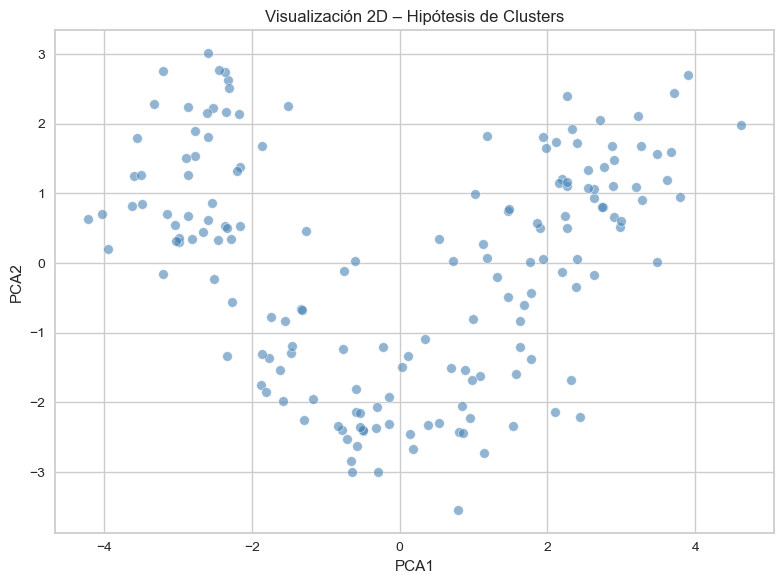

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=PCA_viz_df_kmeans.values[:, 0],
    y=PCA_viz_df_kmeans.values[:, 1],
    alpha=0.6,
    color="steelblue"
)

plt.title("Visualización 2D – Hipótesis de Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.tight_layout()
plt.show()

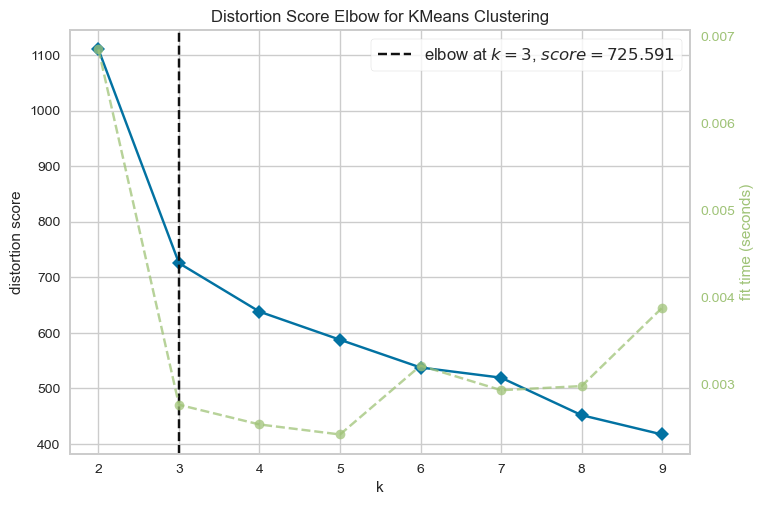

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


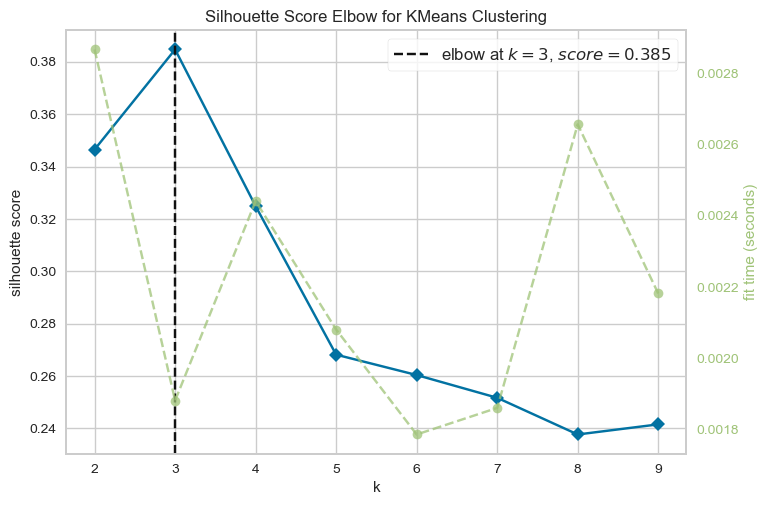

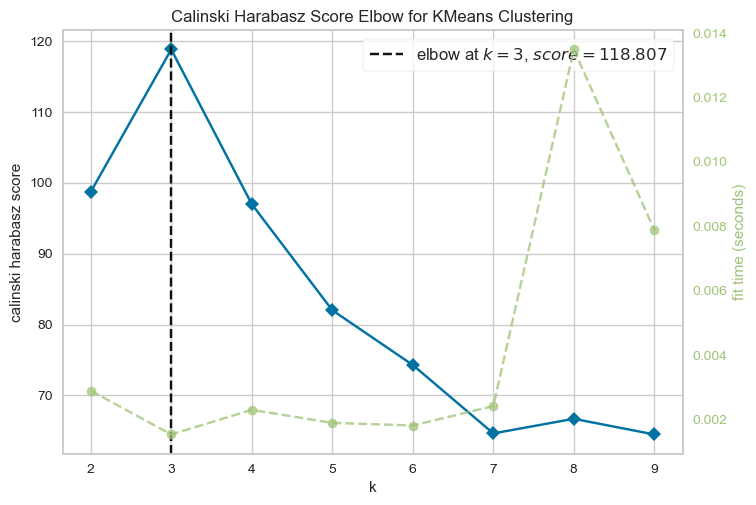

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [26]:
# 1. Distortion (Inercia)
model_inertia = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='distortion')
model_inertia.fit(PCA_model_df_kmeans)
model_inertia.show()

# 2. Silhouette
model_silhouette = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='silhouette')
model_silhouette.fit(PCA_model_df_kmeans)
model_silhouette.show()

# 3. Calinski-Harabasz
model_calinski = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), metric='calinski_harabasz')
model_calinski.fit(PCA_model_df_kmeans)
model_calinski.show()


In [27]:
# Comparación explícita de métricas
scores = {
    "Inercia": model_inertia.elbow_score_,
    "Silhouette": model_silhouette.elbow_score_,
    "Calinski": model_calinski.elbow_score_
}

# Elegir la mejor métrica
best_metric = max(scores, key=scores.get)
print(f"✅ Métrica ganadora: {best_metric}")

# Obtener el mejor valor de K
optimal_k = {
    "Inercia": model_inertia.elbow_value_,
    "Silhouette": model_silhouette.elbow_value_,
    "Calinski": model_calinski.elbow_value_
}[best_metric]

print(f"🔢 K óptimo seleccionado para KMeans: {optimal_k}")

# Aplicar KMeans con scaled_df_clean y PCA_model_df (ambos sin outliers)
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
yhat_kmeans = kmeans.fit_predict(PCA_model_df_kmeans)

# Crear DataFrame para guardar resultados
PCA_cluster_df_kmeans = PCA_model_df_kmeans.copy()
PCA_cluster_df_kmeans["cluster_kmeans"] = yhat_kmeans

# Mostrar primeros resultados
print("📦 Clustering KMeans aplicado (sin outliers):")
display(PCA_cluster_df_kmeans.head())


✅ Métrica ganadora: Inercia
🔢 K óptimo seleccionado para KMeans: 3
📦 Clustering KMeans aplicado (sin outliers):


,PCA1,PCA2,PCA3,PCA4,PCA5,cluster_kmeans
0,3.480609,1.568589,0.063511,-0.398207,-0.632180,2
1,2.388124,-0.337494,-1.886458,-0.673319,-0.024045,2
2,2.624506,0.930060,1.223330,1.062186,0.257078,2
3,3.894769,2.695580,0.040986,0.671661,0.023619,2
4,1.013285,0.986126,2.412583,-0.385064,-0.298921,2


In [28]:
# Tabla de contingencia entre Wine_type real y clusters de KMeans
pd.crosstab(df_clean["Wine_type"], PCA_cluster_df_kmeans["cluster_kmeans"], margins=True)

cluster_kmeans,0,1,2,All
Wine_type,,,,
1,1,0,57,58
2,53,9,1,63
3,0,37,0,37
All,54,46,58,158


In [29]:
cluster_counts = PCA_cluster_df_kmeans['cluster_kmeans'].value_counts().sort_index()
print("Cantidad de muestras por cluster:")
print(cluster_counts)


Cantidad de muestras por cluster:
cluster_kmeans
0    59
1    50
2    59
Name: count, dtype: int64


---

# Ejercicio 2

In [30]:
from nltk.tokenize import word_tokenize
from datasets import load_dataset
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [31]:
# Procesamiento
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lolonastri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
# Lista de stopwords en inglés
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [33]:
# Cargar el dataset IMDb (en inglés)
dataset = load_dataset("imdb")

In [34]:
# Tomamos una muestra de 1000 textos
df = pd.DataFrame(dataset['train']).sample(n=1000, random_state=42).reset_index(drop=True)

In [35]:
# Mostramos los primeros textos originales
print("Ejemplos originales:")
for i in range(3):
    print(f"{i+1}. {df['text'][i][:200]}...\n")

Ejemplos originales:
1. Dumb is as dumb does, in this thoroughly uninteresting, supposed black comedy. Essentially what starts out as Chris Klein trying to maintain a low profile, eventually morphs into an uninspired version...

2. I dug out from my garage some old musicals and this is another one of my favorites. It was written by Jay Alan Lerner and directed by Vincent Minelli. It won two Academy Awards for Best Picture of 195...

3. After watching this movie I was honestly disappointed - not because of the actors, story or directing - I was disappointed by this film advertisements.<br /><br />The trailers were suggesting that the...



## a. Preprocesamiento de texto

Aplicá las siguientes tareas sobre una columna de comentarios o textos en español:

- **Tokenización:** Convertí cada texto en una secuencia de palabras.
- **Eliminación de stopwords:** Remové palabras vacías utilizando una lista en español.
- **Stemming o Lematización:** Elegí una de las dos técnicas y aplicala sobre los tokens procesados.

📌 *Mostrá ejemplos del texto antes y después del preprocesamiento.*

In [36]:
import string
# Función de preprocesamiento
def preprocess_text(text):
    tokens = text.lower().split()  # tokenización básica
    tokens = [t.strip(string.punctuation) for t in tokens if t.isalpha()]  # limpiar signos
    tokens = [t for t in tokens if t not in stop_words]  # quitar stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens]  # lematizar
    return tokens

In [37]:
# Columna con tokens preprocesados
df['tokens'] = df['text'].apply(preprocess_text)

# Mostrar ejemplos antes y después
for i in range(3):
    print(f"\n📄 Texto original #{i+1}:\n{df['text'][i][:300]}...\n")
    print(f"✅ Tokens procesados #{i+1}:\n{df['tokens'][i][:30]}...\n")


📄 Texto original #1:
Dumb is as dumb does, in this thoroughly uninteresting, supposed black comedy. Essentially what starts out as Chris Klein trying to maintain a low profile, eventually morphs into an uninspired version of "The Three Amigos", only without any laughs. In order for black comedy to work, it must be outra...

✅ Tokens procesados #1:
['dumb', 'dumb', 'thoroughly', 'supposed', 'black', 'essentially', 'start', 'chris', 'klein', 'trying', 'maintain', 'low', 'eventually', 'morphs', 'uninspired', 'version', 'three', 'without', 'order', 'black', 'comedy', 'must', 'order', 'black', 'comedy', 'cannot', 'mean', 'really', 'town', 'full']...


📄 Texto original #2:
I dug out from my garage some old musicals and this is another one of my favorites. It was written by Jay Alan Lerner and directed by Vincent Minelli. It won two Academy Awards for Best Picture of 1951 and Best Screenplay. The story of an American painter in Paris who tries to make it big. Nina Foch...

✅ Tokens procesado

## b. Representación vectorial

Convertí los textos preprocesados en vectores numéricos utilizando alguna de las siguientes técnicas:

- Bag-of-Words (BoW)
- TF-IDF (preferido si vas a comparar pesos entre palabras)

📌 *Visualizá brevemente la matriz resultante y contá cuántas dimensiones tiene.*

#### *BoW*

In [38]:
# Unir los tokens preprocesados en un string nuevamente
df['clean_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

# Crear vectorizador BoW
bow_vectorizer = CountVectorizer()
X_bow = bow_vectorizer.fit_transform(df['clean_text'])

print(f"🧱 Matriz BoW: {X_bow.shape}")
print(f"📄 Ejemplo de palabras:\n{bow_vectorizer.get_feature_names_out()[:20]}")

🧱 Matriz BoW: (1000, 13344)
📄 Ejemplo de palabras:
['aamir' 'aaron' 'abandon' 'abandoned' 'abashed' 'abby' 'abc' 'abdominal'
 'abducted' 'abducting' 'abetted' 'abide' 'abiding' 'ability' 'abject'
 'able' 'abnormal' 'aboard' 'abominable' 'abomination']


#### *TF-IDF*

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Transformar el texto a vectores numéricos
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

In [41]:
# Mostrar forma de la matriz y algunas palabras
print(f"✅ La matriz TF-IDF tiene forma: {X_tfidf.shape}")
print(f"🧠 Número de dimensiones (palabras únicas): {len(tfidf_vectorizer.get_feature_names_out())}")

✅ La matriz TF-IDF tiene forma: (1000, 13344)
🧠 Número de dimensiones (palabras únicas): 13344


In [42]:
# Ver algunas features (palabras del vocabulario)
print(f"\n🔤 Algunas palabras del vocabulario:\n{tfidf_vectorizer.get_feature_names_out()[:20]}")


🔤 Algunas palabras del vocabulario:
['aamir' 'aaron' 'abandon' 'abandoned' 'abashed' 'abby' 'abc' 'abdominal'
 'abducted' 'abducting' 'abetted' 'abide' 'abiding' 'ability' 'abject'
 'able' 'abnormal' 'aboard' 'abominable' 'abomination']


## c. Gráfico con las 10 palabras más frecuentes

In [47]:
from collections import Counter

# Aplanar todos los tokens en una sola lista
tokens_finales = [token for lista in df['tokens'] for token in lista]

# Contar frecuencia de cada palabra (TF)
frecuencias = Counter(tokens_finales)

# Mostrar las 10 palabras más frecuentes
top_10 = frecuencias.most_common(10)
for palabra, freq in top_10:
    print(f"{palabra}: {freq}")


movie: 1565
film: 1260
one: 922
like: 769
good: 470
would: 466
get: 461
even: 456
really: 438
make: 425


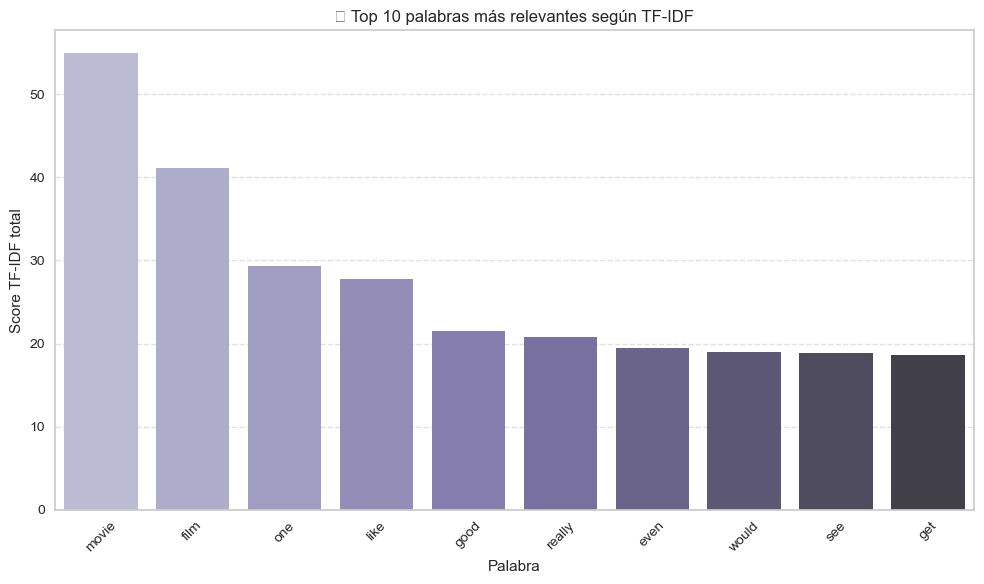

In [46]:
# Obtener vocabulario y puntajes TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = X_tfidf.sum(axis=0).A1  # suma total por palabra

# Combinar en un DataFrame para ordenarlo
tfidf_df = pd.DataFrame({'word': feature_names, 'score': tfidf_scores})
top_tfidf = tfidf_df.sort_values(by='score', ascending=False).head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tfidf['word'], y=top_tfidf['score'], palette="Purples_d")
plt.title("🔝 Top 10 palabras más relevantes según TF-IDF")
plt.xlabel("Palabra")
plt.ylabel("Score TF-IDF total")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


---

# Ejercicio 3